#EXTRACTIVE TEXT SUMMARIZER


#***Introduction***

Purpose:  Combine all articles and create one summary

Method: Extractive Text Summarization using TextRank algorithm 

# ***Importing the dataset***

In [0]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#changing to working directory
cd 'drive/My Drive/Colab Notebooks/2cc 2019'

/content/drive/My Drive/Colab Notebooks/2cc 2019


In [0]:
#downloading the dataset
#!wget https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/10/tennis_articles_v4.csv

#***Importing Dependencies***

In [0]:
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt') #text tokenizer
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


#***Prepare Data for preprocessing***

In [0]:
df = pd.read_csv("tennis_articles_v4.csv")

#split text into sentences
from nltk.tokenize import sent_tokenize 
sentences = []

for s in df['article_text']:
  sentences.append(sent_tokenize(s))
  
sentences = [y for x in sentences for y in x] #flatten the list

Inspecting data (optional)

In [0]:
#inspecting data
print(df['article_text'][0])

Maria Sharapova has basically no friends as tennis players on the WTA Tour. The Russian player has no problems in openly speaking about it and in a recent interview she said: 'I don't really hide any feelings too much. I think everyone knows this is my job here. When I'm on the courts or when I'm on the court playing, I'm a competitor and I want to beat every single person whether they're in the locker room or across the net.So I'm not the one to strike up a conversation about the weather and know that in the next few minutes I have to go and try to win a tennis match. I'm a pretty competitive girl. I say my hellos, but I'm not sending any players flowers as well. Uhm, I'm not really friendly or close to many players. I have not a lot of friends away from the courts.' When she said she is not really close to a lot of players, is that something strategic that she is doing? Is it different on the men's tour than the women's tour? 'No, not at all. I think just because you're in the same s

#***Data Preprocessing***

In [0]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
print(stop_words)
print("No of stop words: {}".format(len(stop_words)))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [0]:
# remove punctuations, numbers and special characters
clean_sentences = pd.Series(sentences).str.replace("[^a-zA-Z]", " ")

# make alphabets lowercase
clean_sentences = [s.lower() for s in clean_sentences]

# function to remove stopwords
def remove_stopwords(sen):
    sen_new = " ".join([i for i in sen if i not in stop_words])
    return sen_new
  
# remove stopwords from the sentences
clean_sentences = [remove_stopwords(r.split()) for r in clean_sentences]

#***Vectorization using GloVe***

In [0]:
#download to google drive
#!wget http://nlp.stanford.edu/data/glove.6B.zip
#!unzip glove*.zip

In [0]:
# Extract word vectors
word_embeddings = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_embeddings[word] = coefs
f.close()

#sentence vectorization
sentence_vectors = []
for i in clean_sentences:
  if len(i) != 0:
    v = sum([word_embeddings.get(w, np.zeros((100,))) for w in i.split()])/(len(i.split())+0.001)
  else:
    v = np.zeros((100,))
  sentence_vectors.append(v)

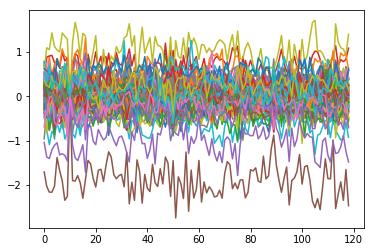

In [0]:
#print(sentence_vectors)

import matplotlib.pyplot as plt
plt.plot(sentence_vectors)
plt.show()

In [0]:
print(sentence_vectors)

[array([ 5.14825583e-02,  1.10544682e-01,  6.94999397e-01,  1.89168096e-01,
       -9.58077684e-02,  3.20288986e-01,  2.70662010e-01,  5.42440832e-01,
       -3.05938005e-01, -1.56364068e-01,  3.70127618e-01,  8.09492469e-02,
        8.41393881e-03,  2.47571543e-01, -3.69342804e-01, -7.61044994e-02,
        8.08582604e-02,  2.30643645e-01, -2.70402402e-01,  5.13828397e-01,
       -6.12548441e-02,  3.87900352e-01,  1.03121363e-01,  7.72494674e-01,
        2.59960234e-01, -7.96069205e-02,  1.42143592e-01, -9.62644577e-01,
        7.54904330e-01,  6.03260659e-02, -4.58570123e-01,  2.36780301e-01,
        2.29152635e-01, -1.56453326e-01,  3.97632688e-01, -2.32720934e-02,
       -5.05520999e-01,  4.13252831e-01, -2.85759270e-01, -1.35231465e-01,
       -1.37098104e-01, -1.48972601e-01,  3.37537557e-01, -3.49540442e-01,
        1.53484434e-01, -2.33341649e-01, -1.98460802e-01, -1.27821520e-01,
        5.08063912e-01, -3.68636876e-01, -2.28472307e-01, -3.15306723e-01,
        1.36149466e-01, 

#***Similarity Matrix preparation***

In [0]:
#similarity matrix
sim_mat = np.zeros([len(sentences), len(sentences)])

from sklearn.metrics.pairwise import cosine_similarity

for i in range(len(sentences)):
  for j in range(len(sentences)):
    if i != j:
      sim_mat[i][j] = cosine_similarity(sentence_vectors[i].reshape(1, 100), sentence_vectors[j].reshape(1, 100))[0,0]
sentence_vectors[j].reshape(1,100) [0,0]

-0.20814046

In [0]:
print(sim_mat)

[[0.         0.64378339 0.59156996 ... 0.72776717 0.5850122  0.68277591]
 [0.64378339 0.         0.83267683 ... 0.77598292 0.79842889 0.87404495]
 [0.59156996 0.83267683 0.         ... 0.73326033 0.75388014 0.8130123 ]
 ...
 [0.72776717 0.77598292 0.73326033 ... 0.         0.74423134 0.87150967]
 [0.5850122  0.79842889 0.75388014 ... 0.74423134 0.         0.78779906]
 [0.68277591 0.87404495 0.8130123  ... 0.87150967 0.78779906 0.        ]]


#***Applying PageRank Algorithm***

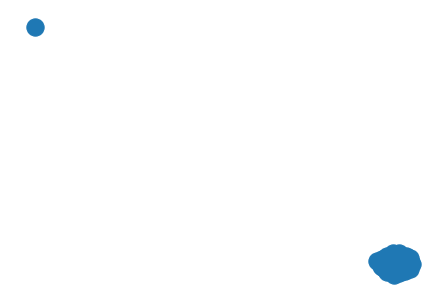

In [0]:
import networkx as nx
nx_graph = nx.from_numpy_array(sim_mat)
scores = nx.pagerank(nx_graph)
nx.draw(nx_graph)
plt.show()

#***Summary Extraction***

In [0]:
ranked_sentences = sorted(((scores[i], s) for i, s in enumerate(sentences)), reverse = True)

#Extract top 10 sentences as the summary
for i in range(10):
  print(ranked_sentences[i][1])

When I'm on the courts or when I'm on the court playing, I'm a competitor and I want to beat every single person whether they're in the locker room or across the net.So I'm not the one to strike up a conversation about the weather and know that in the next few minutes I have to go and try to win a tennis match.
Major players feel that a big event in late November combined with one in January before the Australian Open will mean too much tennis and too little rest.
Speaking at the Swiss Indoors tournament where he will play in Sundays final against Romanian qualifier Marius Copil, the world number three said that given the impossibly short time frame to make a decision, he opted out of any commitment.
"I felt like the best weeks that I had to get to know players when I was playing were the Fed Cup weeks or the Olympic weeks, not necessarily during the tournaments.
Currently in ninth place, Nishikori with a win could move to within 125 points of the cut for the eight-man event in London 

#Checking the extent of summarisation

In [0]:
o_l =  len(df['article_text'][0].split())
s_l = len(ranked_sentences[0][1].split())
print("Original length of text: {}".format(o_l))
print("Summarised length: {}".format(s_l))
print("% of reduction {}".format((o_l - s_l)*100/o_l))


Original length of text: 293
Summarised length: 64
% of reduction 78.15699658703072


In [0]:
original_len=0
summary_len=0
for i in range(len(df['article_text'])):
  original_len += len(df['article_text'][i].split())
  
for i in range(10):
  summary_len += len(ranked_sentences[i][1].split())
  
print("Total length of text: {}".format(original_len))
print("Summary length: {}".format(summary_len))

print("% of reduction: {}".format((original_len - summary_len) * 100/original_len))

Total length of text: 2270
Summary length: 310
% of reduction: 86.34361233480176
